* 파이썬으로 만드는 K-평균 클러스터링 (국립공원 유형 분류)
    * 출처: https://foss4g.tistory.com/1515 (원문:https://github.com/pavankalyan1997/Machine-learning-without-any-libraries/tree/master/2.Clustering/1.K_Means_Clustering)

In [1]:
# 모듈 호출
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.font_manager as format
import numpy as np  
import random as rd 

In [2]:
# 국립공원 기본 통계(출처:KOSIS 국가통계포털)
df = pd.read_csv('NLPRK_STA.csv', encoding='cp949')
df.head()

,공원명,육지면적,탐방객수
0,지리산,483.022,3308833
1,경주,136.550,2887634
2,계룡산,65.335,1817602
3,한려해상,127.188,6439653
4,설악산,398.237,3241484


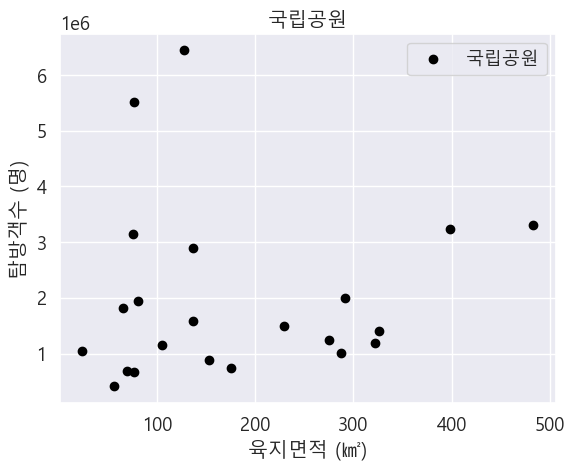

In [5]:
# 폰트 설정
sns.set(font='Malgun Gothic', font_scale=1.2)

# 국립공원 육지면적, 탐방객수
X = df.iloc[:, [1,2]].values # shpe(22,2)
m=X.shape[0] # 집합 개수 (m=22)
n=X.shape[1] # 특징 개수 (n=2)

plt.scatter(X[:,0], X[:,1], c='black', label='국립공원')
plt.xlabel('육지면적 (㎢)')
plt.ylabel('탐방객수 (명)')
plt.legend()
plt.title('국립공원')
plt.show()

In [32]:
# 폰트 설정
sns.set(font='Malgun Gothic', font_scale=1.2)

# 국립공원 육지면적, 탐방객수
X = df.iloc[:, [1,2]].values # shpe(22,2)
m=X.shape[0] # 집합 개수 (m=22)
n=X.shape[1] # 특징 개수 (n=2)

K=3 # 클러스터 개수
n_iter=100 # 반복 횟수
Centroids=np.array([]).reshape(n,0) # 클러스터 중심 초기화
Centroids # shape = (2,0)

array([], shape=(2, 0), dtype=float64)

In [24]:
# 폰트 설정
sns.set(font='Malgun Gothic', font_scale=1.2)

# 국립공원 육지면적, 탐방객수
X = df.iloc[:, [1,2]].values # shpe(22,2)
m=X.shape[0] # 집합 개수 (m=22)
n=X.shape[1] # 특징 개수 (n=2)

K=3 # 클러스터 개수
n_iter=100 # 반복 횟수
Centroids=np.array([]).reshape(n,0) # 클러스터 중심 초기화
Centroids # shape = (2,0)

for i in range(K): # 0, 1, 2
    rand=rd.randint(0,m-1) # 0과 21 사이 난수 생성
    Centroids=np.c_[Centroids,X[rand]] # 클러스터 중심(열) 추가
Centroids # K개 클러스터 중심 초기값. shape=(2,3)

Output={} # 출력값 초기화(딕셔너리)

# 유클리드 거리 초기화
EuclidanDistnace = np.array([]).reshape(m,0)
EuclidanDistnace # shape(22,0)

Centroids[:,0]

# 넘파이 브로드캐스트(broadcast): 형상이 다른 배열끼리도 계산 가능
# (22,2) 행렬 A에서 (2,) 벡터값을 차감하면, 벡터값은 (22,2) 행렬ㄹ로 확대된 후 연산
tempDist = np.sum((X-Centroids[:,0])**2, axis=1)
tempDist # shape = (22,)

np.c_[EuclidanDistnace,tempDist] # (22,0) 행렬에 (22,) 옆으로 붙이기

for k in range(K): # 0, 1, 2
    tempDist=np.sum((X-Centroids[:,k])**2, axis=1)
    EuclidanDistnace=np.c_[EuclidanDistnace, tempDist]
EuclidanDistnace # shape=(22,3)

# 유클리드 거리가 최소가 되는 색인
np.argmin(EuclidanDistnace, axis=1)

# K클러스터 저장
C=np.argmin(EuclidanDistnace, axis=1)+1
C # shpe=(22,)

Y={} # 출력값 임시 딕셔너리

for k in range(K): # 0, 1, 2
    Y[k+1]=np.array([]).reshape(2,0) # 특징 개수
Y

# 출력값 임시 딕셔너리: 키 값에 대한 재귀적 갱신
for i in range(m): # m =22
    Y[C[i]]=np.c_[Y[C[i]], X[i]]
Y

Y[1] # shape=(10,2)
Y[1].T # 전치행렬: shape=(2,10)

# 출력값 임시 디렉터리: 전치행렬
for k in range(K): # 0, 1, 2
    Y[k+1]=Y[k+1].T 
Y
 
for k in range(K): # 0, 1, 2
    Centroids[:,k]=np.mean(Y[k+1], axis=0)
Centroids

array([[1.41214222e+02, 2.27050091e+02, 1.02055000e+02],
       [8.67322222e+05, 2.18727982e+06, 5.97908050e+06]])

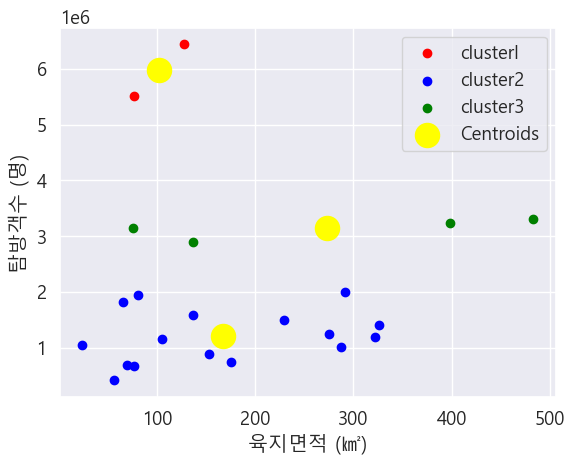

In [38]:
# 폰트 설정
sns.set(font='Malgun Gothic', font_scale=1.2)

# 국립공원 육지면적, 탐방객수
X = df.iloc[:, [1,2]].values # shpe(22,2)
m=X.shape[0] # 집합 개수 (m=22)
n=X.shape[1] # 특징 개수 (n=2)

K=3 # 클러스터 개수
n_iter=100 # 반복 횟수
Centroids = np.array([]).reshape(n,0)    # 클러스터 중심 초기화
Centroids # shape = (2,0)

for i in range(K): # 0, 1, 2
    rand=rd.randint(0,m-1) # 0과 21 사이 난수 생성
    Centroids=np.c_[Centroids,X[rand]] # 클러스터 중심(열) 추가
Centroids # K개 클러스터 중심 초기값. shape=(2, 3)

for i in range(n_iter): # n_iter 반복 횟수
    # 유클리드 거리가 최소가 되는 K 클러스터 할당
    EuclidianDistnace=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2, axis=1) # shape=(22,)
        EuclidianDistnace=np.c_[EuclidianDistnace, tempDist] # shape=(22,3)
    C=np.argmin(EuclidianDistnace,axis=1)+1
    # K 클러스터 갱신
    Y = {}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0) # Y 딕셔너리 키, 값 할당
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]], X[i]] # Y 딕셔너리 키(K클러스터), 값(육지면적, 탐방객수) 할당
    for k in range(K):
        Y[k+1]=Y[k+1].T # 전치 행렬
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1], axis=0) # K클러스터 중심 갱신
    Output=Y

# K-평균 클러스터링 결과 가시화
color = ['red', 'blue', 'green']
labels = ['clusterl', 'cluster2', 'cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0], Output[k+1][:,1], c=color[k], label=labels[k])
plt.scatter(Centroids[0, :], Centroids[1,:], s=300, c='yellow', label='Centroids')
plt.xlabel('육지면적 (㎢)')
plt.ylabel('탐방객수 (명)')
plt.legend()
plt.show()